# **Milestone 2**

### **Import needed libraries**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### **Load the data**

In [96]:
path = "../../data/Faker_Data/Preprocessed_Data/preprocessed_data.csv"
df = pd.read_csv(path)

In [97]:
df.sample(5)

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_groups,age_before_working
13601,50080,26,Male,8,Healthcare,6774,Poor,Low,Average,1,...,Mid,Small,No,Yes,No,Poor,Low,Left,26-35,18
28355,8294,48,Female,18,Healthcare,7907,Good,High,Average,6,...,Mid,Medium,No,No,No,Good,Medium,Stayed,46-55,30
55467,4074,45,Female,12,Technology,9035,Good,Very High,High,4,...,Mid,Medium,Yes,Yes,Yes,Good,Low,Stayed,36-45,33
51984,73003,36,Female,5,Technology,13220,Fair,Medium,High,2,...,Senior,Medium,No,Yes,Yes,Excellent,Medium,Stayed,36-45,31
38478,14172,44,Female,23,Healthcare,6104,Good,Very High,Low,7,...,Mid,Small,No,Yes,Yes,Good,High,Stayed,36-45,21


In [98]:
df.shape

(71569, 25)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71569 entries, 0 to 71568
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               71569 non-null  int64 
 1   age                       71569 non-null  int64 
 2   gender                    71569 non-null  object
 3   years_at_company          71569 non-null  int64 
 4   job_role                  71569 non-null  object
 5   monthly_income            71569 non-null  int64 
 6   work_life_balance         71569 non-null  object
 7   job_satisfaction          71569 non-null  object
 8   performance_rating        71569 non-null  object
 9   number_of_promotions      71569 non-null  int64 
 10  overtime                  71569 non-null  object
 11  distance_from_home        71569 non-null  int64 
 12  education_level           71569 non-null  object
 13  marital_status            71569 non-null  object
 14  number_of_dependents  

In [101]:
df.describe()

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,age_before_working
count,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000,71569.000000
mean,45004.411393,37.467172,9.834523,8154.795791,1.612709,19.411016,1.431570,27.632648
std,26011.829403,9.696294,8.147361,3972.528039,2.000646,14.059812,1.378891,7.962390
min,1.000000,18.000000,0.000000,2410.000000,0.000000,1.000000,0.000000,18.000000
25%,22467.000000,31.000000,3.000000,4798.000000,0.000000,9.000000,0.000000,21.000000
50%,45006.000000,37.000000,8.000000,7345.000000,1.000000,16.000000,1.000000,26.000000
75%,67572.000000,44.000000,15.000000,10384.000000,2.000000,26.000000,2.000000,33.000000
max,89999.000000,65.000000,47.000000,19837.000000,16.000000,134.000000,5.000000,64.000000


In [102]:
df.describe(include='object')

,gender,job_role,work_life_balance,job_satisfaction,performance_rating,overtime,education_level,marital_status,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_groups
count,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569,71569
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2,5
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Mid,Medium,No,No,No,Good,High,Stayed,36-45
freq,37055,21268,30185,24893,35795,50604,31947,41188,32226,32136,45680,43230,39190,36159,23915,48347,26559


In [103]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
age_before_working          0
dtype: int64

In [104]:
df.duplicated().sum()

np.int64(0)

## **1. Advanced Data Analysis**

### **Statistical Tests & Feature Selection**

#### *1. Chi-Squared Test*

In [105]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Define target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Store results
results = []

for col in categorical_cols:
    if col != target:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        significance = "✅" if p < 0.05 else "❌"
        results.append({
            'Feature': col,
            'Chi2': round(chi2, 3),
            'p-value': round(p, 5),
            'DOF': dof,
            'Significant': significance
        })

# Convert to DataFrame
chi_square_df = pd.DataFrame(results).sort_values(by='p-value')

# Display neatly
print("\n=== Chi-Square Test Results vs Attrition ===\n")
print(chi_square_df.to_string(index=False))


=== Chi-Square Test Results vs Attrition ===

                 Feature      Chi2  p-value  DOF Significant
                job_role    89.309  0.00000    4           ✅
       work_life_balance 31470.264  0.00000    3           ✅
        job_satisfaction 34990.416  0.00000    3           ✅
                overtime 14904.511  0.00000    1           ✅
      company_reputation 26391.894  0.00000    3           ✅
leadership_opportunities   107.015  0.00000    1           ✅
            company_size    41.403  0.00000    2           ✅
               job_level    98.118  0.00000    2           ✅
              age_groups    39.219  0.00000    4           ✅
    employee_recognition 26537.150  0.00000    3           ✅
         education_level    15.886  0.00318    4           ✅
          marital_status     7.103  0.02868    2           ✅
             remote_work     1.403  0.23616    1           ❌
                  gender     0.683  0.40840    1           ❌
innovation_opportunities     0.240  0.

In [106]:
# Select features based on chi-square test results
selected_features_chi_square = chi_square_df[chi_square_df['p-value'] < 0.05]['Feature'].tolist()

#### *2. T-test*

In [107]:
# Target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ensure binary target (like Left/Stayed)
groups = df[target].unique()
if len(groups) != 2:
    raise ValueError(f"T-test requires a binary target variable, found: {groups}")

# Store results
results = []

for col in numeric_cols:
    group1 = df[df[target] == groups[0]][col].dropna()
    group2 = df[df[target] == groups[1]][col].dropna()
    
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
    significance = "✅" if p_val < 0.05 else "❌"
    
    results.append({
        'Feature': col,
        'Group1_mean': round(group1.mean(), 3),
        'Group2_mean': round(group2.mean(), 3),
        'T-Statistic': round(t_stat, 3),
        'p-value': round(p_val, 5),
        'Significant': significance
    })

# Create DataFrame
t_test_df = pd.DataFrame(results).sort_values(by='p-value')

# Display results neatly
print("\n=== T-Test Results for Numerical Columns vs Attrition ===\n")
print(t_test_df.to_string(index=False))


=== T-Test Results for Numerical Columns vs Attrition ===

             Feature  Group1_mean  Group2_mean  T-Statistic  p-value Significant
                 age       37.132       37.628       -6.420  0.00000           ✅
    years_at_company        9.465       10.012       -8.473  0.00000           ✅
      monthly_income     7885.882     8283.960      -12.683  0.00000           ✅
number_of_promotions        1.456        1.688      -14.740  0.00000           ✅
         employee_id    44876.019    45066.081       -0.915  0.36024           ❌
  age_before_working       27.667       27.616        0.802  0.42283           ❌
  distance_from_home       19.440       19.397        0.381  0.70343           ❌
number_of_dependents        1.430        1.432       -0.254  0.79947           ❌


In [111]:
# Select features based on t-test results
selected_features_t_test = t_test_df[t_test_df['p-value'] < 0.05]['Feature'].tolist()

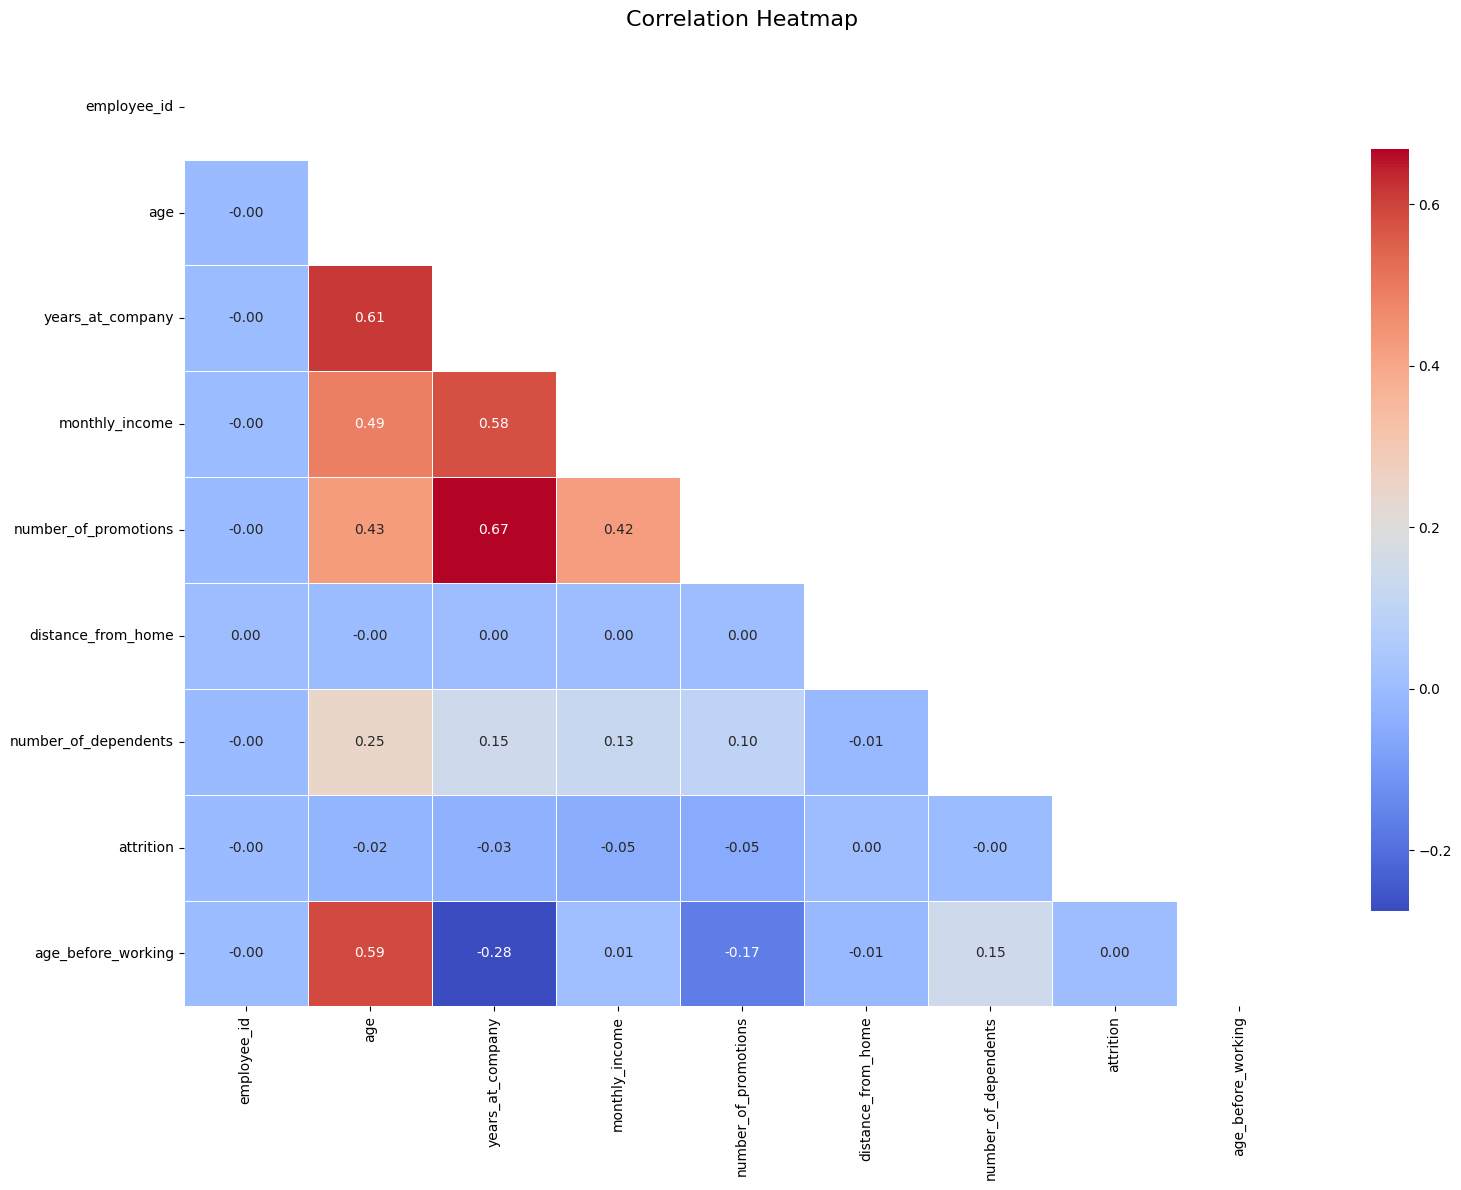

In [112]:
# Copy the dataframe to avoid modifying original
df_encoded = df.copy()

# Encode the tartget variable using label encoding
df_encoded['attrition'] = df_encoded['attrition'].map({'Stayed': 0, 'Left': 1})

# === Compute correlation matrix ===
corr_matrix = df_encoded.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [113]:
selected_features = selected_features_chi_square + selected_features_t_test

In [114]:
df_selected = df[selected_features + ['attrition']]

In [115]:
df_selected.sample(5)

,job_role,work_life_balance,job_satisfaction,overtime,company_reputation,leadership_opportunities,company_size,job_level,age_groups,employee_recognition,education_level,marital_status,age,years_at_company,monthly_income,number_of_promotions,attrition
15907,Education,Fair,Medium,No,Poor,Yes,Large,Senior,46-55,Medium,PhD,Married,53,26,12135,0,Stayed
58682,Media,Good,Medium,No,Good,No,Large,Entry,26-35,Low,High School,Married,30,6,4272,1,Stayed
19960,Finance,Poor,Medium,Yes,Poor,Yes,Medium,Mid,36-45,Low,Master’s Degree,Married,37,15,6921,0,Left
50532,Healthcare,Poor,Low,Yes,Fair,Yes,Large,Senior,36-45,Medium,Bachelor’s Degree,Married,39,10,14814,2,Left
25464,Finance,Poor,High,Yes,Good,No,Large,Entry,36-45,Medium,High School,Divorced,38,7,4066,0,Stayed


In [116]:
df_selected.shape

(71569, 17)

## **Feature Engineering**

### **Create New Features**

In [117]:
df_selected['years_at_company'].describe()

count    71569.000000
mean         9.834523
std          8.147361
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

In [118]:
df_selected['monthly_income'].describe()

count    71569.000000
mean      8154.795791
std       3972.528039
min       2410.000000
25%       4798.000000
50%       7345.000000
75%      10384.000000
max      19837.000000
Name: monthly_income, dtype: float64

In [119]:
# Create new features from old ones (boundries are the quartile values)
# 1️⃣ Tenure Categories
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years < 15:
        return 'Medium-term'
    else:
        return 'Long-term'

df_selected['tenure_category'] = df_selected['years_at_company'].apply(tenure_category)

# 2️⃣ Salary Bands
def salary_band(income):
    if income < 4755:
        return 'Low'
    elif 4755 <= income < 10329:
        return 'Medium'
    else:
        return 'High'
    
df_selected['salary_band'] = df_selected['monthly_income'].apply(salary_band)

In [120]:
df_selected.sample(10)

,job_role,work_life_balance,job_satisfaction,overtime,company_reputation,leadership_opportunities,company_size,job_level,age_groups,employee_recognition,education_level,marital_status,age,years_at_company,monthly_income,number_of_promotions,attrition,tenure_category,salary_band
25871,Finance,Good,Medium,No,Good,No,Large,Mid,26-35,Medium,Master’s Degree,Single,35,7,8394,0,Stayed,Medium-term,Medium
28007,Finance,Poor,Low,Yes,Fair,No,Small,Mid,26-35,Low,Master’s Degree,Married,31,4,7297,1,Left,Medium-term,Medium
2311,Technology,Good,High,Yes,Good,No,Large,Entry,18-25,Very High,High School,Single,19,0,5360,0,Stayed,Short-term,Medium
2986,Finance,Excellent,Very High,No,Good,No,Small,Entry,36-45,Very High,Bachelor’s Degree,Single,36,0,4104,1,Stayed,Short-term,Low
32104,Finance,Good,High,No,Excellent,No,Medium,Mid,26-35,High,Bachelor’s Degree,Single,28,5,6942,1,Stayed,Medium-term,Medium
2538,Education,Excellent,High,No,Good,No,Medium,Entry,18-25,Very High,Associate Degree,Single,18,0,3146,0,Stayed,Short-term,Low
19594,Education,Fair,Medium,No,Fair,Yes,Small,Mid,26-35,Medium,Bachelor’s Degree,Married,30,6,5930,1,Left,Medium-term,Medium
976,Finance,Poor,Low,Yes,Fair,Yes,Small,Senior,46-55,Low,Bachelor’s Degree,Divorced,47,28,13005,5,Left,Long-term,High
35341,Education,Good,Very High,No,Good,Yes,Medium,Mid,26-35,High,Master’s Degree,Single,28,5,5093,1,Stayed,Medium-term,Medium
27692,Technology,Excellent,High,Yes,Good,No,Medium,Mid,26-35,High,Bachelor’s Degree,Married,33,12,7229,2,Stayed,Medium-term,Medium


## **Feature Transformations**

### **Encoding**

In [121]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71569 entries, 0 to 71568
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_role                  71569 non-null  object
 1   work_life_balance         71569 non-null  object
 2   job_satisfaction          71569 non-null  object
 3   overtime                  71569 non-null  object
 4   company_reputation        71569 non-null  object
 5   leadership_opportunities  71569 non-null  object
 6   company_size              71569 non-null  object
 7   job_level                 71569 non-null  object
 8   age_groups                71569 non-null  object
 9   employee_recognition      71569 non-null  object
 10  education_level           71569 non-null  object
 11  marital_status            71569 non-null  object
 12  age                       71569 non-null  int64 
 13  years_at_company          71569 non-null  int64 
 14  monthly_income        

In [122]:
df_selected.select_dtypes(include='object')

,job_role,work_life_balance,job_satisfaction,overtime,company_reputation,leadership_opportunities,company_size,job_level,age_groups,employee_recognition,education_level,marital_status,attrition,tenure_category,salary_band
0,Healthcare,Poor,Low,Yes,Poor,No,Small,Entry,18-25,Low,Associate Degree,Single,Left,Short-term,Low
1,Finance,Good,Medium,No,Good,Yes,Large,Senior,26-35,High,Master’s Degree,Single,Stayed,Medium-term,High
2,Technology,Good,Very High,No,Excellent,Yes,Small,Senior,36-45,High,PhD,Married,Stayed,Long-term,High
3,Technology,Good,High,No,Good,Yes,Medium,Mid,36-45,High,Bachelor’s Degree,Married,Stayed,Medium-term,Medium
4,Education,Good,Very High,No,Good,No,Large,Mid,36-45,Very High,Bachelor’s Degree,Married,Stayed,Medium-term,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,Finance,Excellent,High,No,Good,No,Medium,Entry,18-25,Medium,Master’s Degree,Single,Stayed,Short-term,Low
71565,Technology,Good,Very High,Yes,Good,No,Large,Mid,36-45,Very High,Bachelor’s Degree,Married,Stayed,Short-term,Medium
71566,Healthcare,Good,High,No,Good,No,Medium,Entry,18-25,Medium,Associate Degree,Single,Stayed,Medium-term,Low
71567,Education,Excellent,High,No,Good,No,Medium,Mid,46-55,High,High School,Divorced,Stayed,Long-term,Medium


`Label Encoding`
1. work_life_balance
2. job_satisfaction
3. overtime	
4. job_level	
5. company_size
6. leadership_opportunities
7. company_reputation
8. employee_recognition
9. age_groups
10. education_level
11. attrition
12. tenure_category
13. salary_band

`One hot Encoding`
1. job_role
2. marital_status

In [123]:
label_encode_cols = [
    'work_life_balance', 'job_satisfaction', 'overtime', 'job_level',
    'company_size', 'leadership_opportunities', 'company_reputation',
    'employee_recognition', 'age_groups', 'education_level',
    'attrition', 'tenure_category', 'salary_band'
]

onehot_encode_cols = ['job_role', 'marital_status']

# --- 2️⃣ Apply Label Encoding ---
le = LabelEncoder()

# Apply label encoding to each appropriate column
for col in label_encode_cols:
    if col in df_selected.columns:
        df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# --- 3️⃣ Apply One-Hot Encoding ---
df_encoded = pd.get_dummies(df_selected, columns=onehot_encode_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

In [125]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71569 entries, 0 to 71568
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   work_life_balance         71569 non-null  int64
 1   job_satisfaction          71569 non-null  int64
 2   overtime                  71569 non-null  int64
 3   company_reputation        71569 non-null  int64
 4   leadership_opportunities  71569 non-null  int64
 5   company_size              71569 non-null  int64
 6   job_level                 71569 non-null  int64
 7   age_groups                71569 non-null  int64
 8   employee_recognition      71569 non-null  int64
 9   education_level           71569 non-null  int64
 10  age                       71569 non-null  int64
 11  years_at_company          71569 non-null  int64
 12  monthly_income            71569 non-null  int64
 13  number_of_promotions      71569 non-null  int64
 14  attrition                 71569 non-nu

In [126]:
df_encoded.sample(5)

,work_life_balance,job_satisfaction,overtime,company_reputation,leadership_opportunities,company_size,job_level,age_groups,employee_recognition,education_level,...,number_of_promotions,attrition,tenure_category,salary_band,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Married,marital_status_Single
58515,3,1,1,3,1,0,1,3,1,1,...,0,0,1,2,0,1,0,0,1,0
13071,1,3,0,1,0,1,1,1,0,1,...,0,1,1,2,0,1,0,0,1,0
65928,1,2,0,2,0,0,0,4,2,0,...,0,0,2,1,0,0,0,0,1,0
17525,0,0,0,0,0,0,0,0,3,2,...,0,1,2,2,0,0,0,1,0,1
36753,3,1,1,3,0,1,1,2,1,1,...,3,0,1,2,1,0,0,0,1,0


### **Scaling**

In [127]:
# no_scaling_cols = [
#     'work_life_balance', 'job_satisfaction', 'overtime', 'job_level', 'company_size',
#     'leadership_opportunities', 'company_reputation', 'employee_recognition',
#     'age_groups', 'education_level', 'attrition', 'tenure_category', 'salary_band',
#     'job_role_Finance', 'job_role_Healthcare', 'job_role_Media', 'job_role_Technology',
#     'marital_status_Married', 'marital_status_Single'
# ]

In [129]:
# 🧮 Define the columns for each scaling type
standard_scale_cols = ['age']
minmax_scale_cols = ['years_at_company', 'monthly_income', 'number_of_promotions']

# Copy dataframe to avoid overwriting original
df_scaled = df_encoded.copy()

# ⚙️ Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 🧠 Apply StandardScaler
df_scaled[standard_scale_cols] = standard_scaler.fit_transform(df_scaled[standard_scale_cols])

# 💵 Apply MinMaxScaler
df_scaled[minmax_scale_cols] = minmax_scaler.fit_transform(df_scaled[minmax_scale_cols])

# ✅ Check the scaled results
df_scaled.head()

,work_life_balance,job_satisfaction,overtime,company_reputation,leadership_opportunities,company_size,job_level,age_groups,employee_recognition,education_level,...,number_of_promotions,attrition,tenure_category,salary_band,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Married,marital_status_Single
0,3,1,1,3,0,2,0,0,1,0,...,0.0000,0,2,1,0,1,0,0,0,1
1,2,2,0,2,1,0,2,1,0,3,...,0.1875,1,1,0,1,0,0,0,0,1
2,2,3,0,0,1,2,2,2,0,4,...,0.2500,1,0,0,0,0,0,1,1,0
3,2,0,0,2,1,1,1,2,0,1,...,0.0625,1,1,2,0,0,0,1,1,0
4,2,3,0,2,0,0,1,2,3,1,...,0.0625,1,1,2,0,0,0,0,1,0


## **3. Data Visualization**

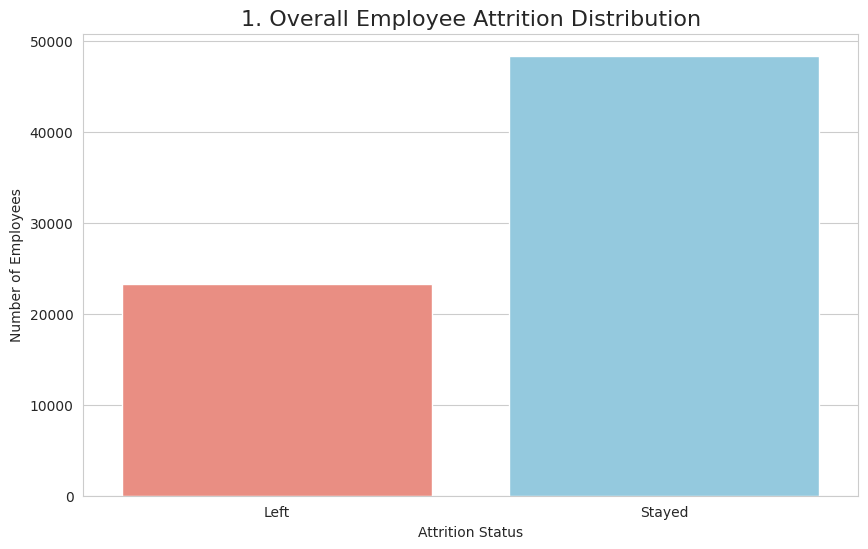

In [130]:
# --- Plotting Setup ---
sns.set_style("whitegrid")
palette_colors = {"Stayed": "skyblue", "Left": "salmon"}

# --- Visualization 1: Overall Attrition ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='attrition', palette=palette_colors)
plt.title('1. Overall Employee Attrition Distribution', fontsize=16)
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()

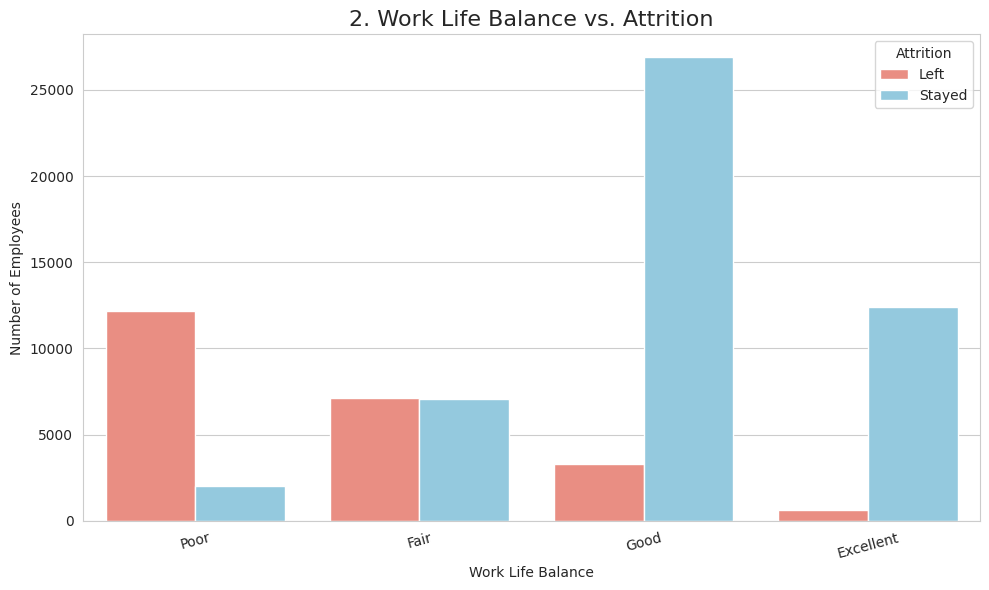

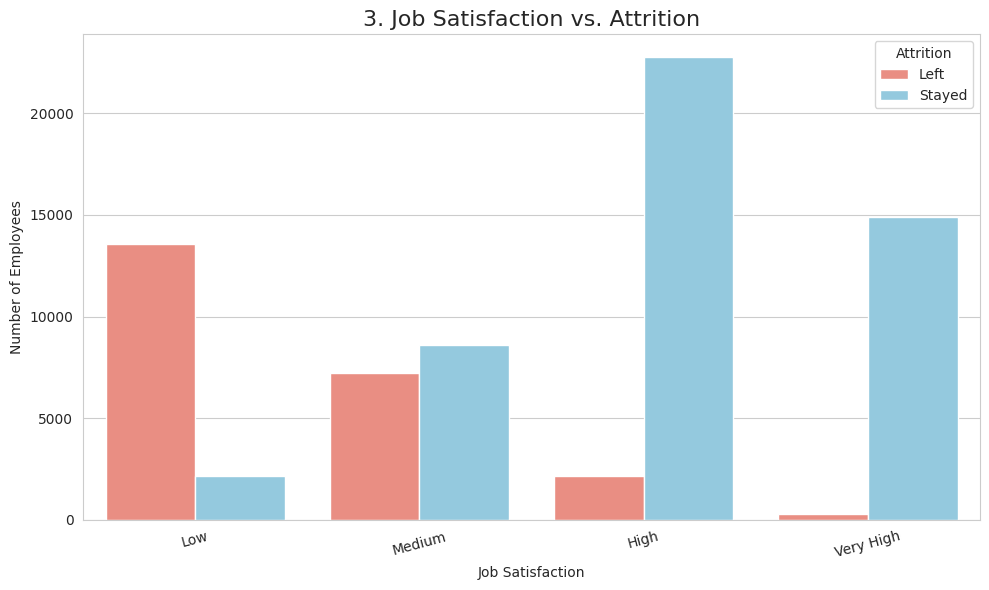

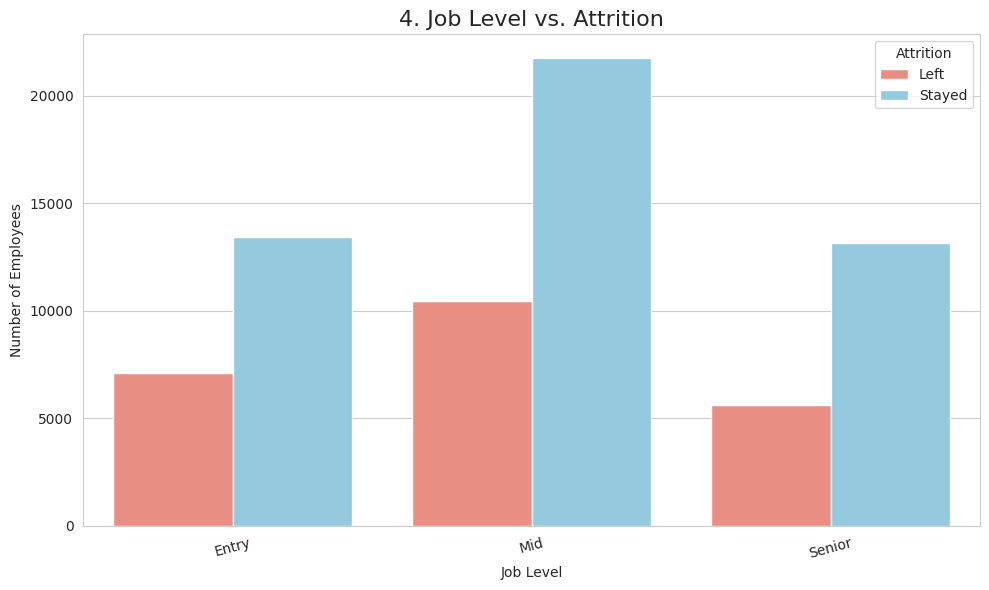

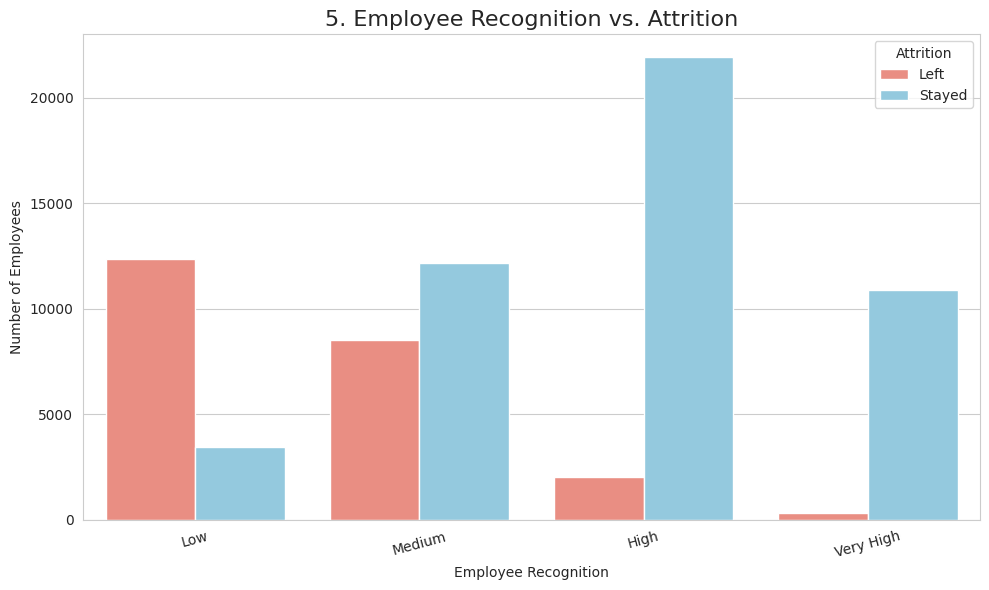

In [131]:
# --- Visualizations 2-5: Categorical Features ---
categorical_features = ['work_life_balance', 'job_satisfaction', 'job_level', 'employee_recognition']
for i, feature in enumerate(categorical_features, 2):
    plt.figure(figsize=(10, 6))
    order = None
    if feature == 'work_life_balance': order = ['Poor', 'Fair', 'Good', 'Excellent']
    elif feature == 'job_satisfaction': order = ['Low', 'Medium', 'High', 'Very High']
    elif feature == 'job_level': order = ['Entry', 'Mid', 'Senior']
    elif feature == 'employee_recognition': order = ['Low', 'Medium', 'High', 'Very High']
    
    sns.countplot(data=df, x=feature, hue='attrition', palette=palette_colors, order=order)
    plt.title(f'{i}. {feature.replace("_", " ").title()} vs. Attrition', fontsize=16)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Number of Employees')
    plt.legend(title='Attrition')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


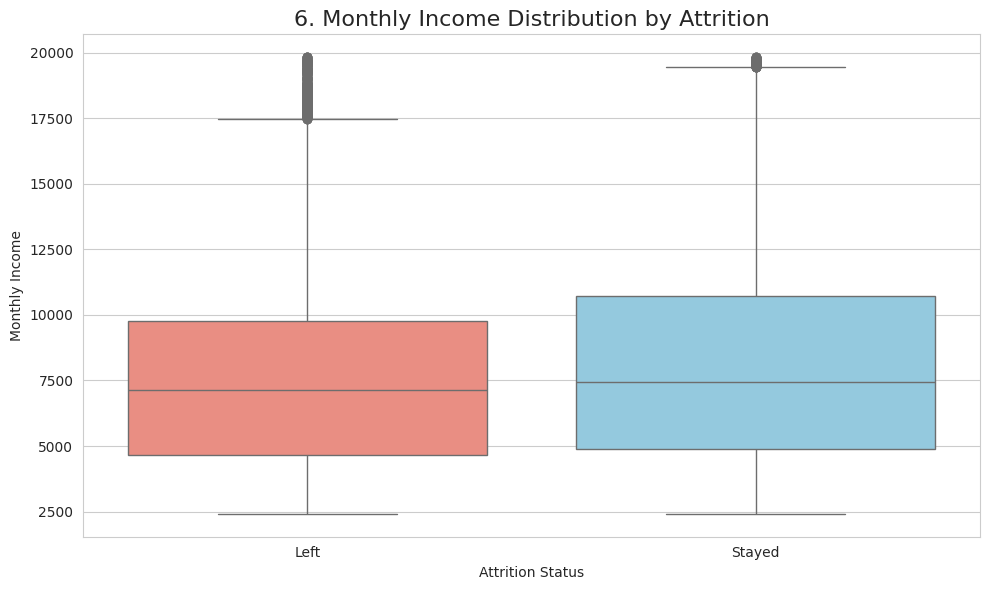

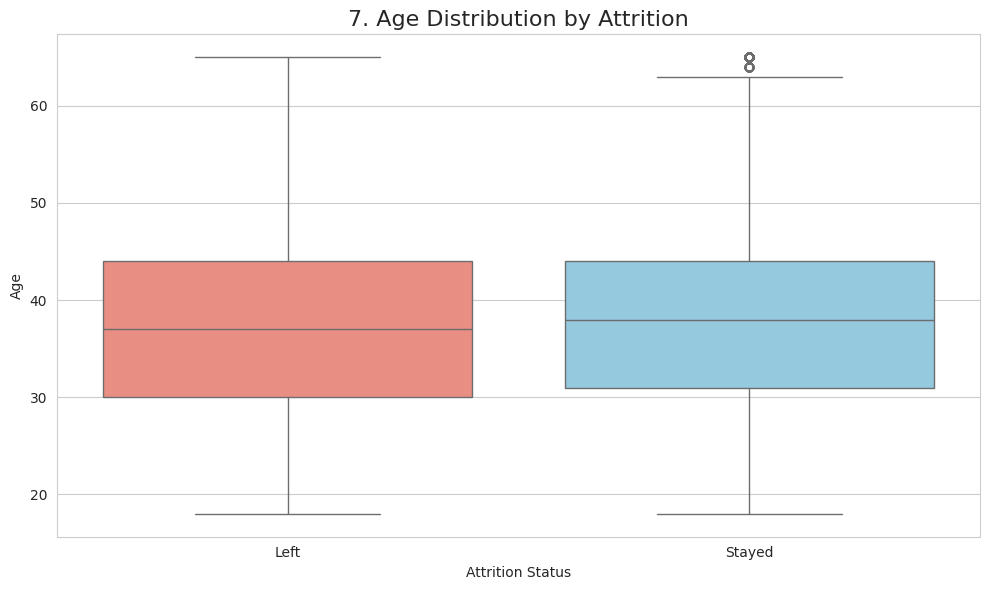

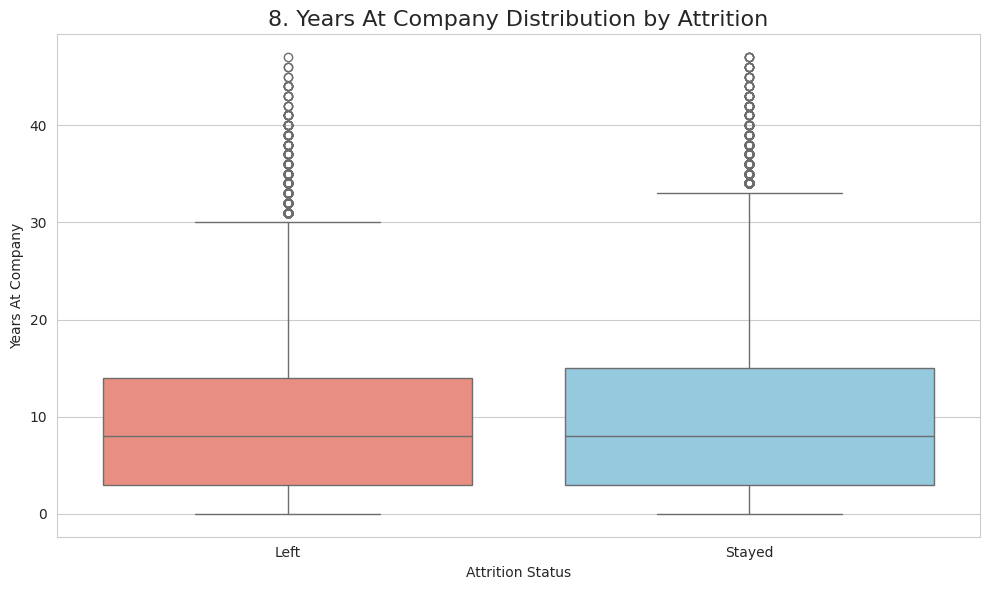

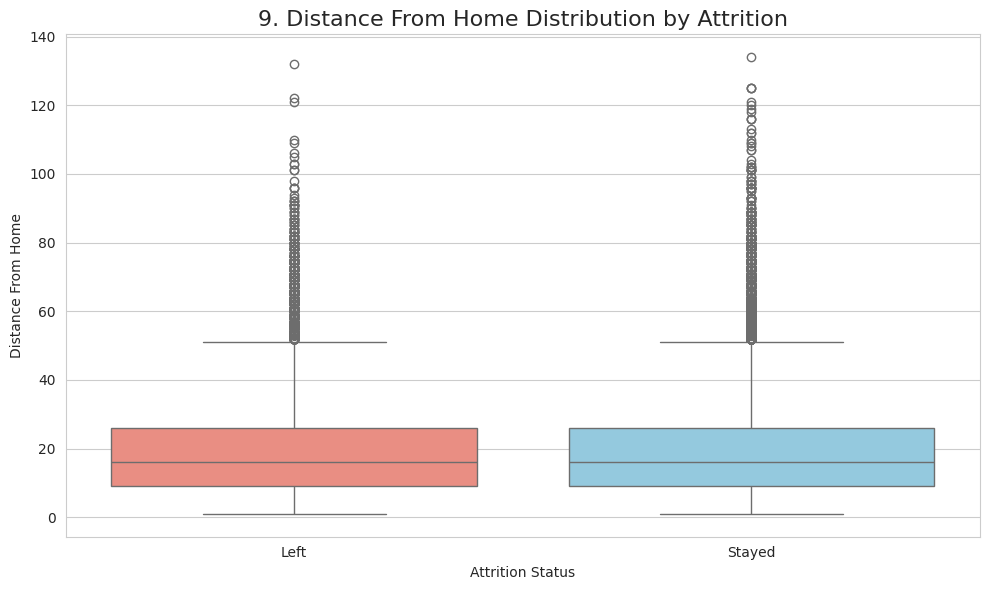

In [132]:
# --- Visualizations 6-9: Numerical Features (Box Plots) ---
numerical_features = ['monthly_income', 'age', 'years_at_company', 'distance_from_home']
for i, feature in enumerate(numerical_features, 6):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='attrition', y=feature, palette=palette_colors)
    plt.title(f'{i}. {feature.replace("_", " ").title()} Distribution by Attrition', fontsize=16)
    plt.xlabel('Attrition Status')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()    

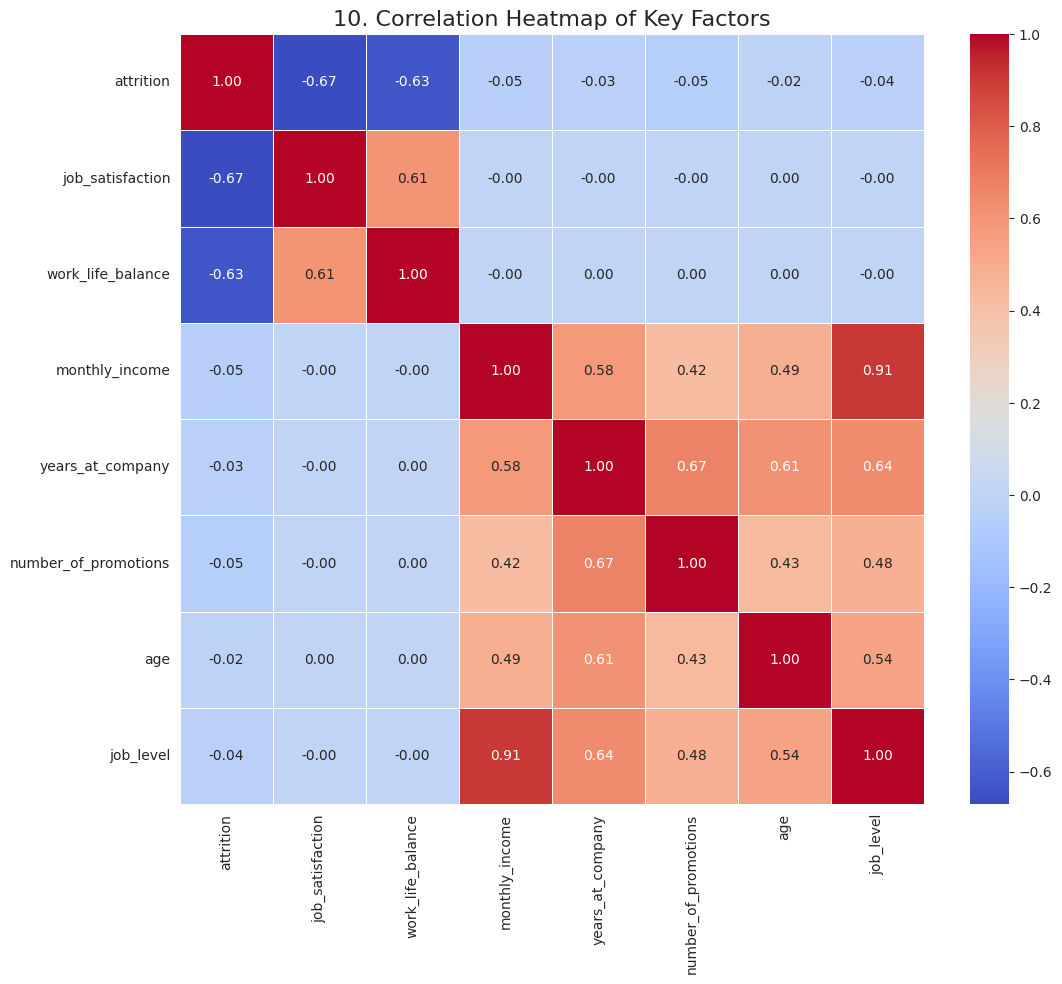

In [133]:
# --- Visualization 10: Correlation Heatmap ---
df_corr = df.copy()
df_corr['attrition'] = df_corr['attrition'].map({'Stayed': 0, 'Left': 1})
mappings = {
    'work_life_balance': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'job_satisfaction': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3},
    'job_level': {'Entry': 0, 'Mid': 1, 'Senior': 2},
    'employee_recognition': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
}
for col, mapping in mappings.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

# We select only the most relevant columns for a cleaner heatmap
relevant_cols = ['attrition', 'job_satisfaction', 'work_life_balance', 'monthly_income', 
                 'years_at_company', 'number_of_promotions', 'age', 'job_level']
correlation_matrix = df_corr[relevant_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('10. Correlation Heatmap of Key Factors', fontsize=16)
plt.show()

In [136]:
df_scaled.to_csv("../../data/Faker_Data/ML_Data/ML_Data.csv", index=False)